# Email Spam Classifier <br>
<h3>Abstract</h3><br>
A basic NLP classification task to classify between spam and ham on a given SMS spam dataset of 5,574 messages. <br>

- The Email Spam Collection is a set of Email tagged messages that have been collected for email Spam research. It contains one set of Email messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

- The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.

In [215]:
## Importing the essential libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline

## Importing the data csv file and Data preprocessing

In [216]:
emails = pd.read_csv('emails.csv')
emails.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [217]:
print (f"There are {emails.shape[0]} rows and {emails.shape[1]} columns.")

There are 5728 rows and 2 columns.


In [218]:
# Removing punctuation
import string 
import nltk.corpus

In [219]:
def remove_punct_stopwords(message):
    form_str = [char for char in message if char not in string.punctuation]
    form_str_join = ''.join(form_str)
    # including subject also in the stopwords list
    words_stop = nltk.corpus.stopwords.words('english')
    words_stop.append('subject')
    form_str_stop = [word for word in form_str_join.split() if word.lower() not in words_stop]
    return form_str_stop

## Exploratory Data Analysis

In [220]:
ham_percent = (emails['spam'].value_counts()/emails.shape[0]*100)[0]
print (f'In the dataset, {ham_percent:.2f}% of the emails are ham, while the rest {(100 - ham_percent):.2f}% of the emails are labelled as spam.')

In the dataset, 76.12% of the emails are ham, while the rest 23.88% of the emails are labelled as spam.


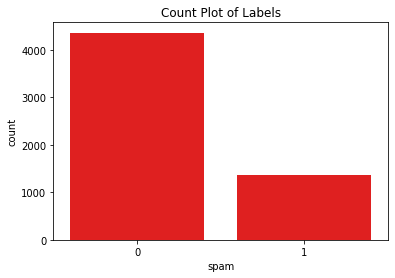

In [221]:
plt.title('Count Plot of Labels')
sns.countplot(emails['spam'], color='r');

In [222]:
# Dividing it into 'spam' and 'ham'
spam = emails[emails['spam']==1]
ham = emails[emails['spam']==0]

In [223]:
spam.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [224]:
ham.head()

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0


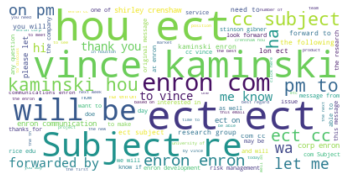

In [225]:
from wordcloud import WordCloud, STOPWORDS
# Creating the wordcloud 
stopwords = set(STOPWORDS)
stopwords.update('Subject')
text = " ".join(text for text in emails.text)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100,background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [226]:
# Using count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer=remove_punct_stopwords)

In [227]:
from sklearn.model_selection import train_test_split
# Applying the count_vectorizer pipeline to features
X = vectorizer.fit_transform(emails.text)
y = emails.spam.values 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.25, stratify = y) 

In [228]:
X.shape

(5728, 37227)

In [229]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
# Initialising the naive bayes models
classifiers = [GaussianNB(),BernoulliNB(),MultinomialNB()]
for cls in classifiers:
    cls.fit(X_train.toarray(),y_train)

In [230]:
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve

In [231]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve

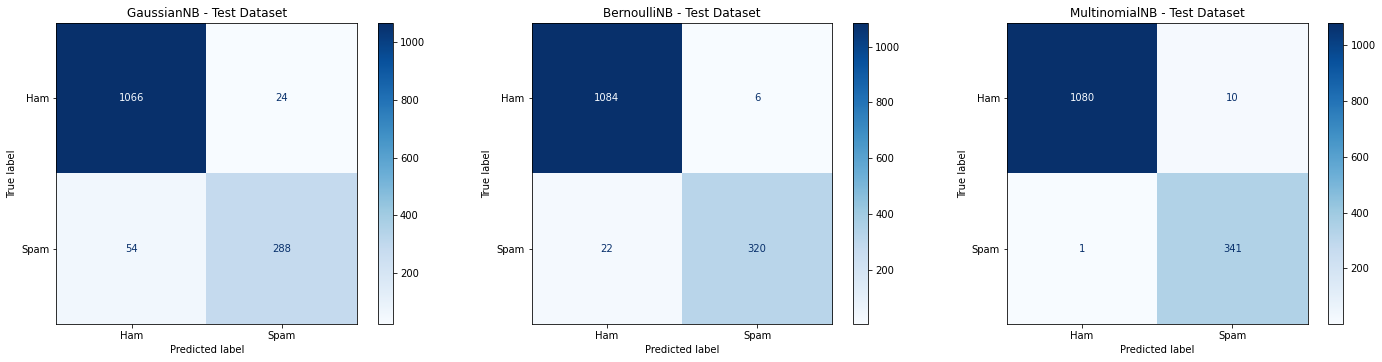

In [232]:
from sklearn.metrics import plot_confusion_matrix
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (20,5))

for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, 
                          X_test.toarray(), 
                          y_test, 
                          ax=ax, 
                          cmap='Blues',
                         display_labels=['Ham','Spam'])
    ax.title.set_text(f'{type(cls).__name__} - Test Dataset')
plt.tight_layout()  
plt.show();

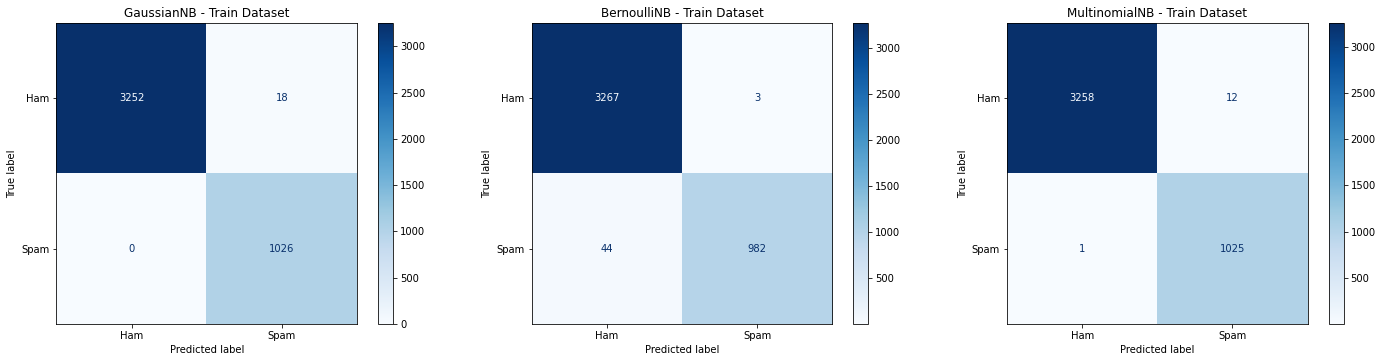

In [233]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (20,5))

for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, 
                          X_train.toarray(), 
                          y_train, 
                          ax=ax, 
                          cmap='Blues',
                         display_labels=['Ham','Spam'])
    ax.title.set_text(f'{type(cls).__name__} - Train Dataset')
plt.tight_layout()  
plt.show()

In [234]:
def fpr_tpr(X,y, model_name):
    # plot the ROC curve
    plt.figure(figsize = [6,6])
    for i in range(3):
        y_pred = classifiers[i].predict(X)
        fpr, tpr, thresholds = roc_curve(y, y_pred)
        model_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{type(classifiers[i]).__name__} - ROC curve (area = {model_auc:0.2f})')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.01])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {model_name}')
    plt.legend(loc="lower right")
    plt.show()


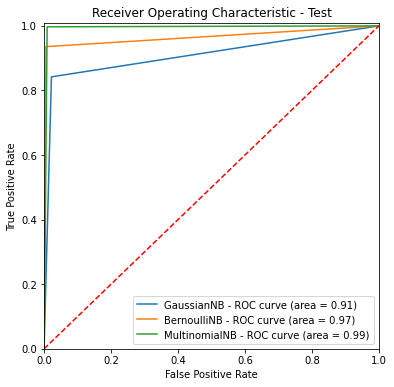

In [235]:
fpr_tpr(X_test.toarray(), y_test, 'Test')

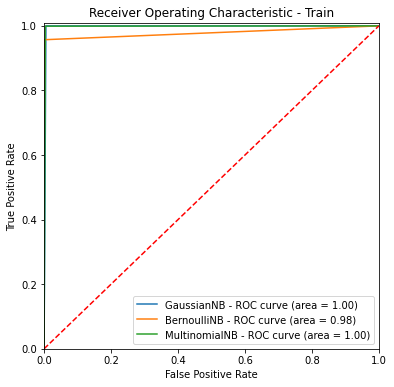

In [236]:
fpr_tpr(X_train.toarray(),y_train, 'Train')

In [237]:
for i in classifiers:
    print (f'{type(i).__name__} - Test')
    print (classification_report(y_test, i.predict(X_test.toarray()), target_names=['Ham','Spam']))

GaussianNB - Test
              precision    recall  f1-score   support

         Ham       0.95      0.98      0.96      1090
        Spam       0.92      0.84      0.88       342

    accuracy                           0.95      1432
   macro avg       0.94      0.91      0.92      1432
weighted avg       0.94      0.95      0.94      1432

BernoulliNB - Test
              precision    recall  f1-score   support

         Ham       0.98      0.99      0.99      1090
        Spam       0.98      0.94      0.96       342

    accuracy                           0.98      1432
   macro avg       0.98      0.97      0.97      1432
weighted avg       0.98      0.98      0.98      1432

MultinomialNB - Test
              precision    recall  f1-score   support

         Ham       1.00      0.99      0.99      1090
        Spam       0.97      1.00      0.98       342

    accuracy                           0.99      1432
   macro avg       0.99      0.99      0.99      1432
weighted avg    

In [238]:
# Saving the multinomial nb model as a pickle file
import joblib
fin_model = classifiers[2]
joblib.dump(fin_model, 'M_NB_spam_model.joblib')
joblib.dump(vectorizer, 'CountVectorizer.joblib')

['CountVectorizer.joblib']

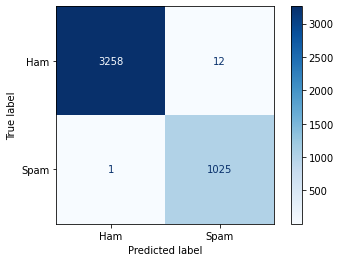

In [239]:
joblib_model = joblib.load('M_NB_spam_model.joblib')
plot_confusion_matrix(joblib_model, 
                          X_train.toarray(), 
                          y_train, 
                          cmap='Blues',
                         display_labels=['Ham','Spam']);

### Conclusion <br>
From the above confusion matrix, ROC curve and classification report we can see that the ML model - Multinomial NB has scored higher in every metric to classify between spam and ham. So, for deploying we can use Multinomial NB as machine learning model.